
##Table of Contents
###1) Business Objective
###2) Data understanding and EDA
- identify target variable
- drop unncesssary and redundnat column
- EDA

###3) Data preparation
- create dummy variables for categorical variables
- split into traina and test sets
-scaling


###4) Model Building
###5) Validation of LR assumptions
###6) Model Prediction
###7) Model Evaluation

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### 1) Business Objective
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##2) Data Understanding and EDA

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Import libraries

In [3]:
#Library for data manipulation
import pandas as pd
#Library for scientific calculation
import numpy as np

#libraries for data visulalization
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries from sklearn 
# module for split into train and test sets
from sklearn.model_selection import train_test_split
# module for scaling the variables 
from sklearn.preprocessing import MinMaxScaler
# Module RFE for automated feature selection
from sklearn.feature_selection import RFE
# Module for linear refression
from sklearn.linear_model import LinearRegression

# import metrics R2 and mean square error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# importing statsmodels library
import statsmodels.api as sm
# importing module for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import scipy library to use q-q plot
import scipy as sp

Load data and inspect shape

In [4]:
#load dataset
data = pd.read_csv("/content/drive/MyDrive/day.csv")
#View data samples
data.shape

(730, 16)

So the dataset has 730 rows and 16 columns.
Lets see few samples

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


We see mix of different types of variables. Lets see the dataset information.

## Data quality check

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We see that there are mix of different variable types. 

Variables ''instant,'temp', 'atemp', 'hum', 'windspeed', 'cnt' are of correct datatype as intended.

According to data dictionary, categorical variables are encoded. Lets see if they are correctly encoded.

In [7]:
# print unique value in of each categorical variables.
cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
for i in cat_var:
  print("values in" ,i,data[i].unique())

values in season [1 2 3 4]
values in yr [0 1]
values in mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
values in holiday [0 1]
values in weekday [6 0 1 2 3 4 5]
values in workingday [0 1]
values in weathersit [2 1 3]


The values matches as said in data dictionary.

Lets check for null values,

In [8]:
#total number null values in dataset
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

So it is confirmed that there are no null values to be removed.
Lets also see statistical info of the variables 

In [9]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Identifying target variable

In [10]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


From the data dictionary, it is understood that variables "casual","registered" and "cnt" gives number of casual, registered and total users per day. Since we are interested only in total users, we can drop other two.
This is also done so that they dont become inputs to model and affect model performance. Also as target is continous variable , this becomes a regression problem.

In [11]:
#Drop casual and registered variables
data.drop(["casual","registered"],axis =1,inplace =True  )

Lets see distribution of target variable.

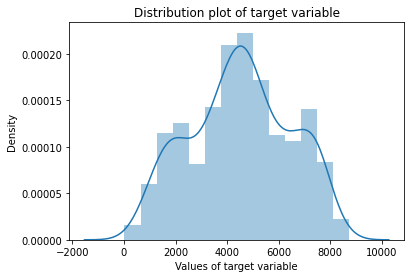

In [12]:
# distribution plot of target variable
sns.distplot(data.cnt)
plt.title("Distribution plot of target variable")
plt.xlabel("Values of target variable")
plt.ylabel("Density")
plt.show()

We also see that the "instant" variable is just the sample number and doesnt have effect on target variable. Hence it can be dropped.

In [13]:
#Drop instant variable
data.drop(["instant"],axis =1,inplace =True  )

Also since month and year data is available in variables "mnth" and "yr", the dteday variable becomes redundant. But we can create derieved variable "date" ie day of month which could have affect on target. After this we can drop dteday variable.

In [14]:
#strip the day of  month  information from dteday variable
data["day"] = data["dteday"].apply(lambda x: x.split("-")[0])
# convert day to numeric
data["day"] = data["day"].apply(lambda x: int(x))
#drop dteday variable
data.drop(["dteday"],axis =1,inplace =True  )


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  day         730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


Lets check the corelation between variables.

In [16]:
#show corelation data
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,1.925989e-03
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,-1.856233e-16
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,1.189318e-02
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,-1.037108e-02
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-4.318179e-04
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,8.520708e-03
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-2.617822e-02
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,2.600883e-02
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,1.992047e-02
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,4.029371e-02


Lets visualize corelation using heatmap

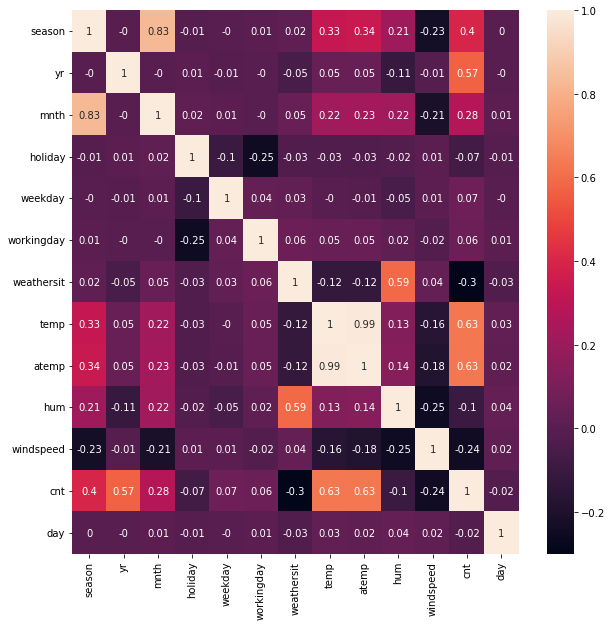

In [17]:
#APply appropriate  size to fig
plt.figure(figsize= (10,10))
#plot corelation heatmap and round off values to 2 decimal places
sns.heatmap(round(data.corr(),2), annot = True)
plt.savefig("heatmap.jpeg")
plt.show()

We see that "temp" and "atemp" are almost perfectly corelated with corelation of 0.99. Also from data dictionary, see that they show real tempeature and feeling temperature which are bound to be corelated.
Hence we will drop one of them ie "atemp" to prevent multicolinarity in model. 


In [18]:
#Drop atemp variable
data.drop(["atemp"],axis =1,inplace =True  )

Lets see the final shape and some samples

In [19]:
print(data.shape)
data.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,5


Lets check how numeric varibles vary with target.

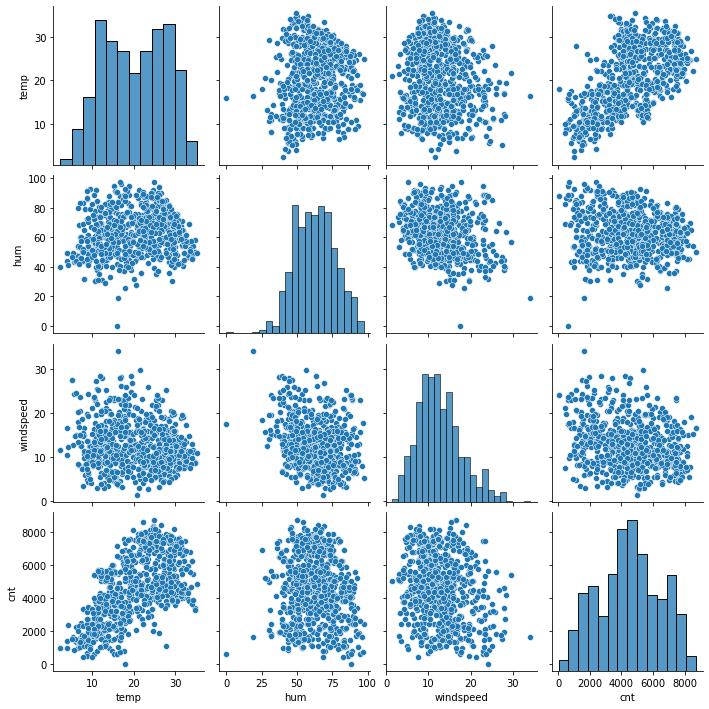

In [20]:
#list of numeric variables
num_vars = ["temp","hum","windspeed","cnt"]
#create pairplots
sns.pairplot(data[num_vars])
plt.savefig("Pairplot.jpeg")
plt.show()

### Insight
We see that there seems to be linear relation between variable "temp" and target.

Now lets explore categorical variables. But from data dictionary see that some of them are encoded into numericals. For example for variable "season", spring is encoded as 1 and summer as 2. But this encoding has a problem that model will interpret summer as twice of 2 numerically which is illogical. Hence we will decode these categorical varibles to their actual meaning and then encode them appropriately.

Lets map these back to original categories.
We also know 1st Jan 2018 was monday. Hence we know that in dataset weekday Mon is encoded as 6 and not 0.

In [21]:
#mapping categorical variables to original categories.
#mapping for season variable
data["season"] = data["season"].map({1 :"spring", 2: "summer",3:"fall",4:"winter"})
#mapping for season variable
data["weekday"] = data["weekday"].map({5 :"sun", 6: "mon",0:"tue",1:"wed",2:"thur",3:"fri",4:"sat"})
#mapping for season variable
data["mnth"] = data["mnth"].map({1: "Jan",2:"Feb",3:"Mar",4:"April",5:"May",6:"June",7 :"July", 8: "Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})
#mapping for season variable
data["weathersit"] = data["weathersit"].map({1 :"clear", 2: "mist",3:"light rain",4:"heavy rain"})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,spring,0,Jan,0,mon,0,mist,14.110847,80.5833,10.749882,985,1
1,spring,0,Jan,0,tue,0,mist,14.902598,69.6087,16.652113,801,2
2,spring,0,Jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349,3
3,spring,0,Jan,0,thur,1,clear,8.200000,59.0435,10.739832,1562,4
4,spring,0,Jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600,5


Now for the categorical variables, lets see how they vary with target variable.

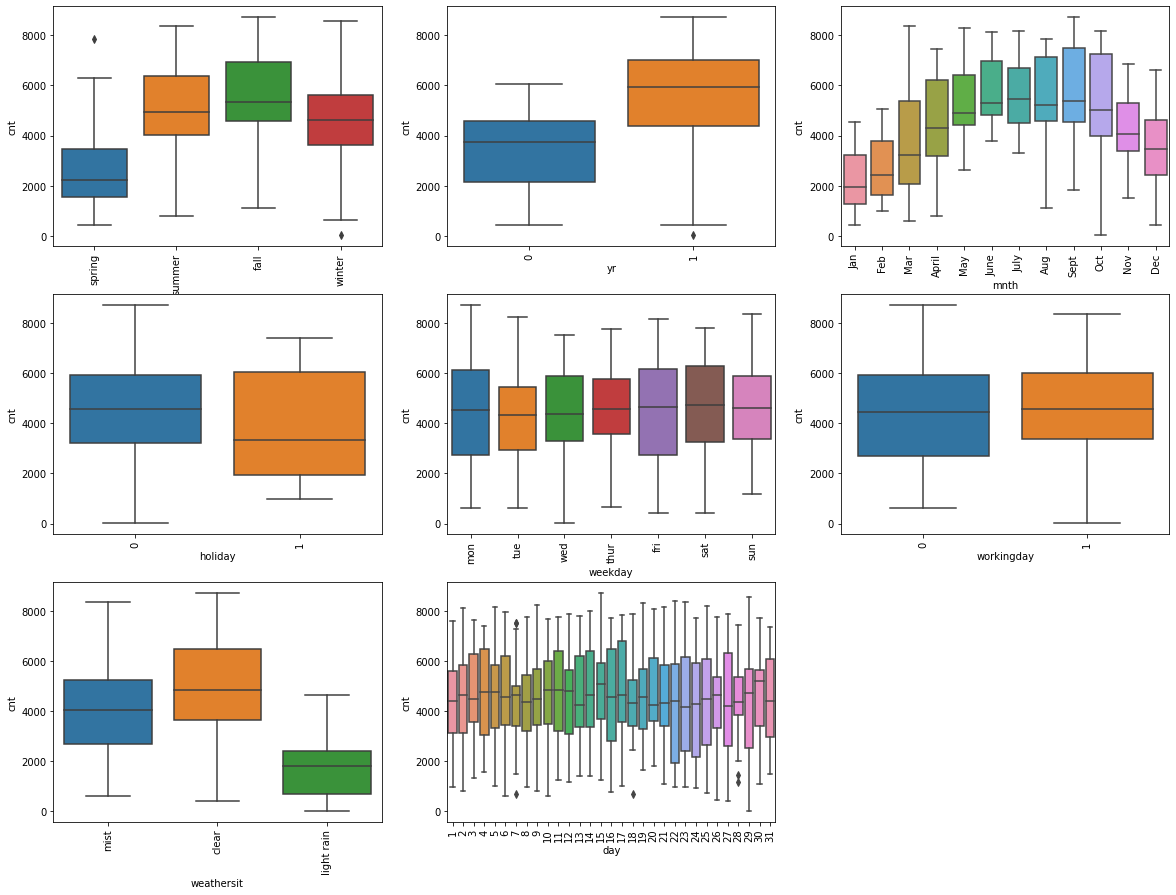

In [22]:
# list of categorical variables
var_cat = ["season","yr","mnth","holiday","weekday","workingday","weathersit","day"]
# plot boxplots
plt.figure(figsize = (20,15))
for i,col in enumerate(var_cat):
  plt.subplot(3,3,i+1)
  sns.boxplot(x = col,y = "cnt", data = data)
  plt.xticks(rotation = 90)
plt.savefig("boxplot.jpeg")

## Insights



season : Bike usage is highest during the fall season and lowest during spring. There is considerable in bike usage among different season and hence could be a good predictor for the target variable.

yr: We see that the demand for shared bikes have increased and almost an increase of 50% from 2018 to 2019. Hence we there is inreaing demand over years.

mnth: We see the demand increasing across the year and peak in september and decrease here. Hence mnth can be good predictor variable for target variable.

holiday: median bike demand is higher during non holidays. This is opposite to what we expected. Hence the dataset could be biased or it may be getting affected by other factor.

weathersit: We see highest demand when weather is clear and least during 
light rain. Also no demand during high rain weather. Hence weather can be a good predictor for target varibale.

day, weekday, workinday: For these variables , the difference in demand among respective categories is very small. Hence we can assume their effect independently on demand is not much.


There are outliers for variables day, yr and season.

#2) Data Preparation


## Creating dummy variables for categorical variables

It will be done for 'season','mnth','weekday', 'weathersit'.
It will not be done for 'yr','holiday','workingday' which are already binary encoded.

We will drop one category for each variable as only p-1 dummy variables are needed for p categories for a variable. But this is not done for weathersit variable as we may lose valuable information.


In [23]:
#create dummy varaible and drop first category
data = pd.get_dummies(data = data, columns = ['season','mnth','weekday'],drop_first = True)
# do same for weathersit variable except droping first category
data = pd.get_dummies(data = data, columns = ["weathersit"])


Lets see the shape now

In [24]:
data.shape

(730, 31)

So we have 31 columns now including target variable.
Lets see the columns

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   day                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  mnth_Aug               730 non-null    uint8  
 12  mnth_Dec               730 non-null    uint8  
 13  mnth_Feb               730 non-null    uint8  
 14  mnth_Jan               730 non-null    uint8  
 15  mnth_J

Note that as we use first drop then alphabetically first category got dropped. For example Fri got dropped for weekday variable.

## Split data into train and test sets

The train data will be used to train the model and model will use this data to earn parameters. The test set will be used to test the performance of that model. This spliting helps us understand how model performs on unseen data. We will be using standard 80:20 split ie 80% data will be used to train model while rest 20% to test it.

In [26]:
#split data using 80:20 ratio
df_train, df_test = train_test_split(data,train_size =0.80,test_size=0.20, random_state =100)

Lets check the shape of train and test dataset

In [27]:
df_train.shape

(584, 31)

In [28]:
df_test.shape

(146, 31)

So the split has worked perfectly.

### Scaling

We will be using the MinMax Scaler which scales the data to range between 0 and 1. This ensures that all variables are in comparable range and help in better interpretation of the  final coeffcients of the model. 
We will fit and transform the scaler on train data and later use the tranformation on test data. We will transforming only numeric variables as categorical variables have already been encoded as 0/1.

In [29]:
# list of numeric variables
var_num = ['temp','hum','windspeed','cnt']
# Create MinMaxScaler object
scaler = MinMaxScaler()
# Using MinMaxScaler for scaling 
df_train[var_num] = scaler.fit_transform(df_train[var_num])

Lets see if the variables are scaled

In [30]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,season_summer,...,mnth_Sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_clear,weathersit_light rain,weathersit_mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,0.515792,15.479452,0.251712,0.246575,...,0.080479,0.150685,0.135274,0.123288,0.133562,0.154110,0.148973,0.630137,0.027397,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,0.225336,8.974880,0.434369,0.431387,...,0.272267,0.358048,0.342309,0.329049,0.340472,0.361363,0.356367,0.483181,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.522837,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,0.691872,23.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see that scaling worked and all variables are scaled to range between 0 and 1.

##3) Model building

We see that the target variable "cnt" is a continousia and so we need to use a regression model. We also see that there are multiple input variables and some of them seem to have a linear relation with target variable.
Hence we will be using a Multiple Linear Regression Model.

Lets create x_train and y_train from train set

In [31]:
# pop out the target variable to get y_train
y_train = df_train.pop('cnt')
#rest becomes X_train
X_train = df_train

## Approach

We will be using a mixed approach ie a combination of automated and then manual approach.
For the automated approach we will use: Recursive Feature Elimination(RFE) and the manually remove feature one by one according to p value and VIF values.

## RFE 

Since there are 30 input features, will choose top 50% features using RFE of sklearn library.
Hence we will set no of fetures to 15 in RFE.


In [32]:
# Create linear regression object
lr = LinearRegression()
# fit object to train data
lr.fit(X_train, y_train)
# Select top 15 features using RFE
rfe = RFE(lr, n_features_to_select =15)      
# fit rfe to data      
rfe = rfe.fit(X_train, y_train)

Lets see the result of RFE

In [33]:
# show list of variable , their RFE status and RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 16),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', False, 3),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 15),
 ('weekday_sun', False, 13),
 ('weekday_thur', False, 8),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 7),
 ('weathersit_clear', True, 1),
 ('weathersit_light rain', True, 1),
 ('weathersit_mist', True, 1)]

Now lets see the top 15 columns selected by RFE

In [34]:
# variables supported by rfe
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'weekday_mon', 'weathersit_clear', 'weathersit_light rain',
       'weathersit_mist'],
      dtype='object')

These are the fetures that have most significant for modelling.
Lets also see those rejected by RFE.

In [35]:
X_train.columns[~rfe.support_]

Index(['holiday', 'day', 'season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sept', 'weekday_sat',
       'weekday_sun', 'weekday_thur', 'weekday_tue', 'weekday_wed'],
      dtype='object')

Now finally lets create the X_train with the selected features that will be used for training the model.

In [36]:
# Creating X_train using selected variables
X_train_rfe = X_train[col]

In [37]:
list(col)

['yr',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_July',
 'mnth_Nov',
 'weekday_mon',
 'weathersit_clear',
 'weathersit_light rain',
 'weathersit_mist']

## Modelling with manual approach

We will create linear regression model with all the selected variables first.Then we will drop one variable according to p value and VIF values and create new model. We will repeat this until we get a model where no more variables can be dropped.

Since this is a repetitive procedure we will create user defined functions that create model and another one that give VIF values.

Lets create a function that create linear model with statsmodel module using the columns given as input. We will print summary of module and also return the model.

In [38]:
# Function to build a model using statsmodel api 
def build_lr_model(cols):
    # add constant term which is not present by default in statsmodel api
    X_train_sm = sm.add_constant(X_train[cols])
    # Choose Ordinary least square  as method and fit the model to train data
    lm = sm.OLS(y_train, X_train_sm).fit()
    #print model summary
    print(lm.summary())
    # return the linear model
    return lm

Also create a function that calculate VIF values for the given set of columns

In [39]:
# Function to calculate VIFs 
def calculate_vif(cols):
    # slice only required columns for train
    df = X_train[cols]
    # empty data frame to store vif values
    vif = pd.DataFrame()
    # first column is feature names
    vif['Features'] = df.columns
    # second columns is the VIF values
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    # roundoff VIF values to 2 decimal places
    vif['VIF'] = round(vif['VIF'],2)
    # print sorted df according to VIF in descending order
    print(vif.sort_values(by='VIF',ascending=False))

Now lets create first model using all the RFE selected features.

## Model 1

Lets see the columns we will use.

In [40]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'weekday_mon', 'weathersit_clear', 'weathersit_light rain',
       'weathersit_mist'],
      dtype='object')

We will create list of columns and use the function sto create model and get summary.

In [41]:
# create list of selected columns
col_list = list(X_train_rfe.columns)  
col_list  

['yr',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_July',
 'mnth_Nov',
 'weekday_mon',
 'weathersit_clear',
 'weathersit_light rain',
 'weathersit_mist']

In [42]:
# build model using required columns and print summary
model1 = build_lr_model(col_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          6.59e-224
Time:                        14:52:00   Log-Likelihood:                 596.66
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     569   BIC:                            -1098.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

We will drop a variable if it is not significant ie p value <0.05 or it has high multicolinearity ie VIF value >5.
We see that all features have acceptable p values and adjusted R2 is 0.847 which is a good value.
Lets also see the VIF values.

In [43]:
# cacluate VIF for new list of columns
calculate_vif(col_list)

                 Features    VIF
12       weathersit_clear  44.99
14        weathersit_mist  30.77
13  weathersit_light rain   3.96
2                    temp   3.55
5           season_spring   2.84
6           season_winter   2.19
3                     hum   1.94
8                mnth_Jan   1.60
10               mnth_Nov   1.60
1              workingday   1.58
11            weekday_mon   1.57
7                mnth_Dec   1.41
9               mnth_July   1.28
4               windspeed   1.19
0                      yr   1.03


We see that features "weathersit_clear" and "weathersit_mist" have very high VIF value. VIF values >5 means more than 80 percent of that variable is explained by other variables. So we will remove the variable with higher VIF and create model again and see summary.

## Model 2

So lets remove the variable and see the the columns again

In [44]:
# remove variable of hihg VIF value
col_list.remove("weathersit_clear")
col_list

['yr',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_July',
 'mnth_Nov',
 'weekday_mon',
 'weathersit_light rain',
 'weathersit_mist']

Now we have 14 variables. Lets create model again and see summary.

In [45]:
# build model using required columns and print summary
model2 = build_lr_model(col_list)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          6.59e-224
Time:                        14:52:00   Log-Likelihood:                 596.66
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     569   BIC:                            -1098.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

 We see that all features have acceptable p values and adjusted R2 is 0.845.
 The R2 value didnt drop and model is still good. Lets also see the VIF values.

In [46]:
# cacluate VIF for new list of columns
calculate_vif(col_list)


                 Features    VIF
3                     hum  25.83
2                    temp  17.92
1              workingday   4.44
4               windspeed   4.23
5           season_spring   3.03
6           season_winter   2.77
13        weathersit_mist   2.29
0                      yr   2.08
11            weekday_mon   1.77
8                mnth_Jan   1.71
10               mnth_Nov   1.69
7                mnth_Dec   1.51
9               mnth_July   1.38
12  weathersit_light rain   1.23


We see that features "hum" and "temp" have very high VIF value. We will remove the variable with higher VIF ie "hum" and create model again and see summary.

## Model 3


So lets remove the variable and see the the columns again

In [47]:
# remove required column
col_list.remove("hum")
col_list

['yr',
 'workingday',
 'temp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_July',
 'mnth_Nov',
 'weekday_mon',
 'weathersit_light rain',
 'weathersit_mist']


Now we have 13 variables. Lets create model again and see summary.

In [48]:
# build model using required columns and print summary
model3 = build_lr_model(col_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     242.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          2.72e-222
Time:                        14:52:00   Log-Likelihood:                 589.98
No. Observations:                 584   AIC:                            -1152.
Df Residuals:                     570   BIC:                            -1091.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

 We see that all features have acceptable p values and adjusted R2 is 0.843.
 The R2 value change is negligible. Lets also see the VIF values.

In [49]:
calculate_vif(col_list)

                 Features   VIF
2                    temp  6.22
1              workingday  4.34
3               windspeed  4.23
4           season_spring  2.44
5           season_winter  2.40
0                      yr  2.07
10            weekday_mon  1.76
9                mnth_Nov  1.65
7                mnth_Jan  1.62
12        weathersit_mist  1.55
6                mnth_Dec  1.42
8               mnth_July  1.33
11  weathersit_light rain  1.08


We see that features "temp" has  high VIF value. But temp has high coefficient vaue 0f 0.44 and it according to our knowledge it has significant effect on a business like bike sharing. Thus we will not remove temp variable and  will remove the next variable with higher VIF and create model again and see summary. So we will remove "workingday"

## Model 4

So lets remove the variable and see the the columns again

In [50]:
# remove workingday
col_list.remove("workingday")
col_list

['yr',
 'temp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_July',
 'mnth_Nov',
 'weekday_mon',
 'weathersit_light rain',
 'weathersit_mist']

Now we have 12 variables. Lets create model again and see summary

In [51]:
# build model using required columns and print summary
model4 = build_lr_model(col_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     244.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.57e-216
Time:                        14:52:00   Log-Likelihood:                 572.19
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     571   BIC:                            -1062.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

 We see that all features have acceptable p values and adjusted R2 is 0.834.
 Hence dropping "holiday" didnt affect performance of model.
 The R2 value drop is negligible. Lets also see the VIF values.

In [52]:
# cacluate VIF for new list of columns
calculate_vif(col_list)

                 Features   VIF
1                    temp  4.40
2               windspeed  4.13
4           season_winter  2.36
3           season_spring  2.34
0                      yr  2.07
8                mnth_Nov  1.65
6                mnth_Jan  1.61
11        weathersit_mist  1.52
5                mnth_Dec  1.41
7               mnth_July  1.32
9             weekday_mon  1.18
10  weathersit_light rain  1.07


We see that temp has high VIF but we dont want to drop it as it is significant variable. So lets drop "weekday_mon" variable that has relatively higher p value and lower coefficient and see the model performance again.

## Model 5

So lets remove the variable and see the the columns again

In [53]:
col_list.remove("weekday_mon")
col_list

['yr',
 'temp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_July',
 'mnth_Nov',
 'weathersit_light rain',
 'weathersit_mist']

Now we have 11 variables. Lets create model again and see summary.

In [54]:
# build model using required columns and print summary
model5 = build_lr_model(col_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     264.6
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.16e-216
Time:                        14:52:00   Log-Likelihood:                 569.60
No. Observations:                 584   AIC:                            -1115.
Df Residuals:                     572   BIC:                            -1063.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

 We see that all features have acceptable p values and adjusted R2 is 0.833.
 The R2 value drop is negligible. Lets also see the VIF values.

In [55]:
calculate_vif(col_list)

                 Features   VIF
1                    temp  4.35
2               windspeed  4.10
4           season_winter  2.35
3           season_spring  2.34
0                      yr  2.07
8                mnth_Nov  1.65
6                mnth_Jan  1.61
10        weathersit_mist  1.52
5                mnth_Dec  1.41
7               mnth_July  1.32
9   weathersit_light rain  1.07


We see that temp still has high VIF but we dont want to drop it as it is significant variable. So lets drop "mnth_Jan " variable that has relatively higher p value and see the model performance again.

## Model 6

So lets remove the variable and see the the columns again

In [56]:
col_list.remove("mnth_Jan")
col_list

['yr',
 'temp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_Dec',
 'mnth_July',
 'mnth_Nov',
 'weathersit_light rain',
 'weathersit_mist']

Now we have 10 variables. Lets create model again and see summary.

In [57]:
# build model using required columns and print summary
model6 = build_lr_model(col_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     285.3
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.26e-215
Time:                        14:52:00   Log-Likelihood:                 564.30
No. Observations:                 584   AIC:                            -1107.
Df Residuals:                     573   BIC:                            -1059.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

 We see that all features have acceptable p values and adjusted R2 is 0.830.
 The R2 value drop is negligible which validates dropping variable. Lets also see the VIF values.

In [58]:
calculate_vif(col_list)

                Features   VIF
1                   temp  4.30
2              windspeed  4.10
4          season_winter  2.33
0                     yr  2.06
3          season_spring  1.73
7               mnth_Nov  1.65
9        weathersit_mist  1.51
5               mnth_Dec  1.36
6              mnth_July  1.31
8  weathersit_light rain  1.07


We see that all features are significant ie p value = 0 and all high VIF value < 5 and model performance is still good. But lets see if can drop one more variable without loss in performance. So lets drop variable "mnth_Dec" which has relatively higher p value and see model performance.

## Model 7

So lets remove the variable and see the the columns again

In [59]:
col_list.remove("mnth_Dec")
col_list

['yr',
 'temp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_July',
 'mnth_Nov',
 'weathersit_light rain',
 'weathersit_mist']

Now we have 9 variables. Lets create model again and see summary.

In [60]:
# build model using required columns and print summary
model7 = build_lr_model(col_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     309.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.71e-214
Time:                        14:52:00   Log-Likelihood:                 558.38
No. Observations:                 584   AIC:                            -1097.
Df Residuals:                     574   BIC:                            -1053.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

 We see that all features have acceptable p values. But adjusted R2 is 0.827 and model performance is still good.Lets also see the VIF values.

In [61]:
calculate_vif(col_list)

                Features   VIF
1                   temp  4.27
2              windspeed  4.10
0                     yr  2.06
4          season_winter  1.87
3          season_spring  1.68
8        weathersit_mist  1.51
6               mnth_Nov  1.50
5              mnth_July  1.31
7  weathersit_light rain  1.07


So all variables have acceptable VIF values. Now lets drop the insignificant value mnth_Nov( as per p value of 0.03) and see the model performance again.

## Model 8


So lets remove the variable and see the the columns again

In [62]:
col_list.remove("mnth_Nov")
col_list

['yr',
 'temp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_July',
 'weathersit_light rain',
 'weathersit_mist']

Now we have 8 variables. Lets create model again and see summary.

In [63]:
# build model using required columns and print summary
model8 = build_lr_model(col_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     342.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          3.35e-213
Time:                        14:52:01   Log-Likelihood:                 553.87
No. Observations:                 584   AIC:                            -1090.
Df Residuals:                     575   BIC:                            -1050.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

 We see that all features have acceptable p values and adjusted R2 is 0.824.
 The R2 value drop is negligible. Lets also see the VIF values.

In [64]:
calculate_vif(col_list)

                Features   VIF
1                   temp  4.23
2              windspeed  4.04
0                     yr  2.06
3          season_spring  1.68
7        weathersit_mist  1.51
4          season_winter  1.38
5              mnth_July  1.31
6  weathersit_light rain  1.07


All variable have acceptable VIF values.
Now this is our final model ie model8.
It has 8 features all of which are significant( p values =0) and acceptable VIF values. Model performance is adjusted R2 of 0.824.

So model8 is our best performing model with all p values =0 and VIF <5. Now we will build final model with sklearn library using the finally selected 8 variables.

## Create Final model using Sklearn

We will build the model8 again using sklearn using same variables.

In [65]:
# list of final features
col_list 

['yr',
 'temp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_July',
 'weathersit_light rain',
 'weathersit_mist']

We will create final x_train using these features and create model using sklearn

In [66]:
# Make X_train_reg by using only finally selected variables
X_train_reg = X_train[col_list]
# Create LR object using sklearn
lr_model = LinearRegression()
# fit the model with X_train_reg,y_train
lr_model.fit(X_train_reg,y_train)

LinearRegression()

Now lets see the coefficients and intercept of the model

In [67]:
# Coefficients of the model
lr_model.coef_

array([ 0.23095189,  0.48659326, -0.1462218 , -0.11866421,  0.04967465,
       -0.0858815 , -0.28284312, -0.07574402])

In [68]:
# Intercept value
lr_model.intercept_

0.2399727952956794

Now lets see the model performance by plotting the ground truth y_train and predicted values.

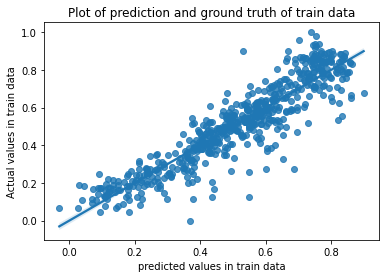

In [69]:
# Get the predicted values of target variable
y_train_pred = lr_model.predict(X_train_reg)

# Plot a regplot between y_train and y_train_pred to see linear pattern
sns.regplot(y_train_pred,y_train)
plt.title("Plot of prediction and ground truth of train data")
plt.xlabel("predicted values in train data")
plt.ylabel("Actual values in train data")
plt.show()



This seems to be a goood fit. Now lets get the R2 and adjusted R2 values of the model on train.

In [70]:
# R2 score on train data
R2_train = r2_score(y_train,y_train_pred)
R2_train



0.8266843629826668

In [71]:
# Calculating the Adjusted R2 value using formula
# no of samples
n = len(X_train.index)
# no of final features
p = len(lr_model.coef_)
Adj_R2_train = 1-(1-R2_train)*(n-1)/(n-p-1)
Adj_R2_train

0.8242730149893822

So both r2 and adjusted r2 value of train data match as expected and is a healthy 0.82. The values are expected to match because we are predicted on the same train data we used to train the model.




##5) Validation of assumptions of Linear regression

Assumption: There is linear relation between target variable and independent variables.

Lets plot scatter plot of target with independent variables  

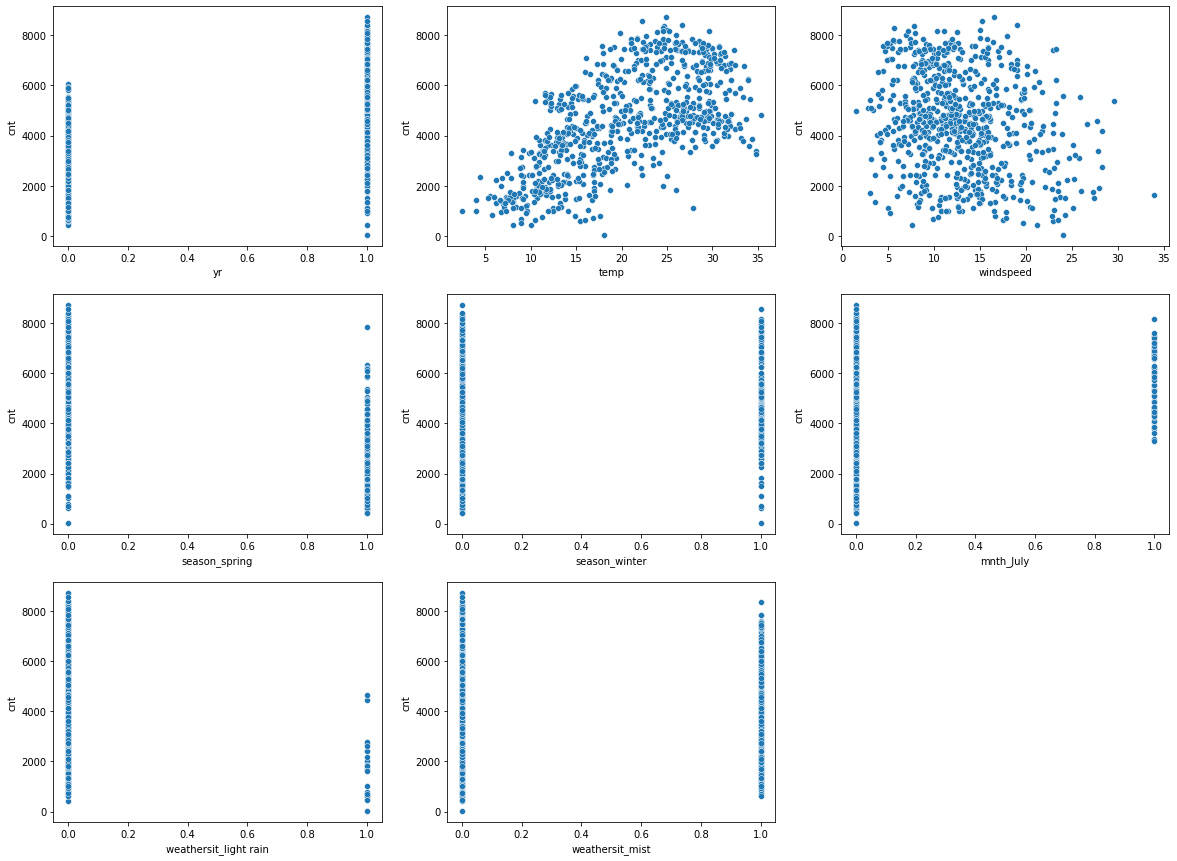

In [72]:
# scatter plot of target with independent variables
plt.figure(figsize = (20,15))
for i,col in enumerate(col_list):
  plt.subplot(3,3,i+1)
  sns.scatterplot(x = col,y = "cnt", data = data)
plt.savefig("scatter.jpeg")


From the plot we see that variables like temperature has a linear relationship with the target variable.
Hence the assumption is validated.

### Residual Analysis

 We will validate assumption that the error(residuals) are normally distributed with mean zero.

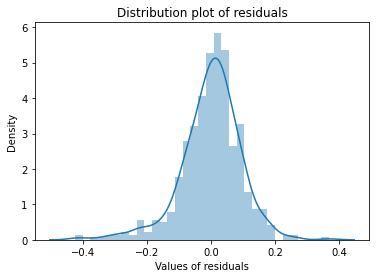

In [73]:
# calculate residuals
res = y_train - y_train_pred
# plot residual distribution
sns.distplot(res)
plt.title("Distribution plot of residuals")
plt.xlabel("Values of residuals")
plt.ylabel("Density")
plt.savefig("normal.jpeg")
plt.show()

The distribution plot of residuals show a normal distribution.
Lets also plot Q-Q plot between residual distribution and theoritical normal distribution.

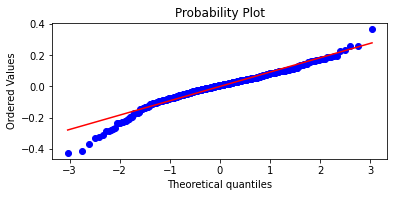

In [74]:
# Q-Q plot using scipy library
fig, ax = plt.subplots(figsize=(6,2.5))
# plot with normal distribution by default
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)
plt.savefig("probPlot.jpeg")

We see that it follows a stright line. So the residuals are similar to normal distribution and follows a normal distribution.

So the assumption of LR that residuals are normally distributed is validated.

## Homoscedasticity and independence

LR assumes that the error terms have constant variance and are independent.
Lets check for the same for our model.

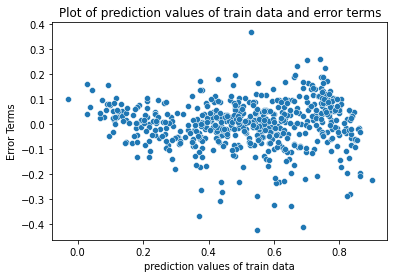

In [75]:
# Plot a scatter plot for residuals and y predicted values 
sns.scatterplot(y_train_pred,res)
plt.title("Plot of prediction values of train data and error terms")
plt.xlabel("prediction values of train data")
plt.ylabel("Error Terms")
plt.savefig("Homoscedacity.jpeg")
plt.show()

We can see the error terms is not following any common patterns and is completely random in nature. Hence this assumption of LR is also validated.

So our final model satisfies all the assumption so multiple linear regression

## Model Prediction

Now lets make prediction using model on unseen data ie test data.
We will have to do same preprocessing on test data as done on train data.
Will do scaling on test data but only transform and not fit on it as model is not intended to learn from test data.

In [76]:
# numeric varibles to be scaled
var_num

['temp', 'hum', 'windspeed', 'cnt']

In [77]:
# Scaling of the num_vars in test data using scaler.transform
df_test[var_num] = scaler.transform(df_test[var_num])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,season_summer,...,mnth_Sept,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_clear,weathersit_light rain,weathersit_mist
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.569603,0.635933,0.315127,0.517368,16.684932,0.226027,0.273973,...,0.089041,0.116438,0.171233,0.219178,0.178082,0.102740,0.123288,0.650685,0.034247,0.315068
std,0.498699,0.182488,0.436469,0.238088,0.156357,0.161524,0.212757,8.031621,0.419697,0.447530,...,0.285783,0.321854,0.378009,0.415114,0.383899,0.304664,0.329899,0.478395,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.055683,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.359075,0.534457,0.196160,0.391251,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.614856,0.306383,0.508916,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.730570,0.411976,0.649994,23.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.800793,0.963300,31.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So scaling has worked.
Lets create X and y for test data.

In [78]:
# create x and y for test data
y_test = df_test.pop('cnt')
X_test = df_test

Lets create final X for test by selecting only the selected features.

In [79]:
# Creating X_test_reg out of the significant variables col_list
X_test_reg = X_test[col_list]


Now lets predict for test data.

In [80]:
# Predicting the values for test data
y_test_pred = lr_model.predict(X_test_reg)

Lets evaluate the model performance on test data.
Lets visulaiz the results first.

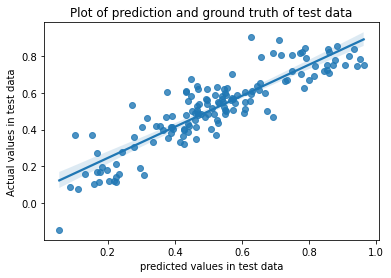

In [81]:
# Plotting a regplot between y_test and y_pred
sns.regplot(y_test,y_test_pred)
plt.title("Plot of prediction and ground truth of test data")
plt.xlabel("predicted values in test data")
plt.ylabel("Actual values in test data")
plt.show()

We see that y_test is linearly distributed and y_pred is the best fit line.
Now lets check R2 values.

In [82]:
# R2 score on test data
R2_test = r2_score(y_test,y_test_pred)
R2_test



0.7783161914468111

In [83]:
# Calculating the Adjusted R2 value using formula
# no of samples
n = len(X_test.index)
# no of final features
p = len(lr_model.coef_)
Adj_R2_test = 1-(1-R2_test)*(n-1)/(n-p-1)
Adj_R2_test

0.7653711515312964

### Insight
We see that adjusted R2 value on test data 0.76 is close to that on train data of 0.82. Hence the model has not overfitted and the model has actually learned from the train data.

Lets see mean square error metric of model.

In [84]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_test_pred))

Mean squared error: 0.01


This is excellent value as the mean square error is negligible here

# Model Evaluation

## Model performance

How well the the predictors describe the target variable is given by : R2 value and mean square error value of model.

####Mean square error value of model is: 0,01

####Adjusted R2 value on train data:
 0.82
####Adjusted R2 value on test data:
 0.76

#####So model is explained to explain close to 80% of variance on average in data.Also since adjusted R2 value on both train and test data is similar, hence there is no overfitting in our model.

####Prob (F-statistic): 3.35e-213         
Value close to 0 shows that the model is a good fit on data.
#####p values of features selected: all equal to zero. VIF values of features selected: all less than 5 shows that  all features selected are significant and independent.


All assumptions of LR is validated for final model and it is a valid model.


Now lets see the significant features and their coefficients.

In [85]:
# Create dataframe with the significant features and the their respective coefficeints
coefficients = pd.DataFrame({"features": col_list, "coefficients": lr_model.coef_})
coefficients.sort_values(by = 'coefficients',ascending = False)



,features,coefficients
1,temp,0.486593
0,yr,0.230952
4,season_winter,0.049675
7,weathersit_mist,-0.075744
5,mnth_July,-0.085882
3,season_spring,-0.118664
2,windspeed,-0.146222
6,weathersit_light rain,-0.282843


Top 3 predictors are : temperature and year both related positively an to demand and light rain weather related negatively to demand.

### Interpretation of coefficients

We see that there are total 8 features.

3 features namely 'yr','temp','season_winter'
have positive coefficents. That means a unit increase in value of these features when other features are constant increases the demand by value of coefficient of the corresponding feature.

5 features namely 'mnth_Sept','season_summer', 'windspeed','weathersit_light rain'and 'weathersit_mist'
have positive coefficents. That means a unit increase in value of these features when other features are constant increases the demand by value of coefficient of the corresponding feature.


The most important feature are temperature , year and light rain weather as they have coefficients more than 0.2.



The best fit line equation is given by

In [86]:
# Add constant term
print("cnt = 0.24 +", end = " ")
# add feature and its coefficint product
for i in range(len(coefficients)):
  print(coefficients.features[i],"*", round(coefficients.coefficients[i],3),"+")

cnt = 0.24 + yr * 0.231 +
temp * 0.487 +
windspeed * -0.146 +
season_spring * -0.119 +
season_winter * 0.05 +
mnth_July * -0.086 +
weathersit_light rain * -0.283 +
weathersit_mist * -0.076 +


# Conclusion

So we have modelled a multiple linear regression model for the bike sharing demand for the independent variables. 

It helps us understand the demand dynamic. For example model tells us that demand is higher duting higher tempeature days and also that demand is expected to increase year wise. 

It also helps in formulating business strategy.
A srategy could be to increase availabilty of price during high demand expected period according to model and to give discounts and offers during lower demand expected period.